In [ ]:
#Libraries importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the train and test dataset**

In [ ]:
train_data = pd.read_csv('Train.csv')
train_data.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [ ]:
test_data = pd.read_csv('Test.csv')
test_data.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


**EDA - Exploratory Data Analysis**

*Understanding the data

*Checking for Null values

*Replacing the Null values with Mean, Median and Mode

*Droping unwanted coloumns

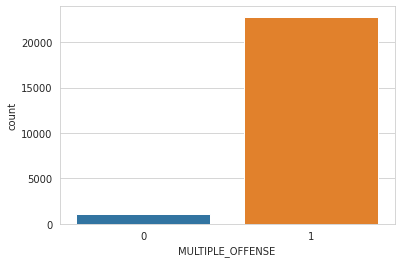

In [ ]:
#Visualization of Multiple_offense
sns.set_style('whitegrid')
sns.countplot(x='MULTIPLE_OFFENSE', data = train_data)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(23856, 18)
(15903, 17)


In [ ]:
#checking null values for train data set
train_data.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [ ]:
#median of missing value 'X_12' (training data)
train_data['X_12'].median()

1.0

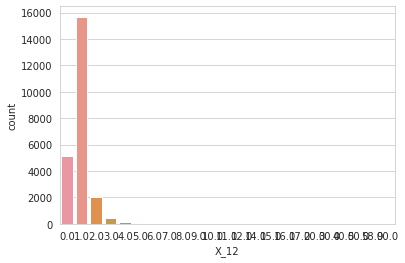

In [ ]:
#Visualization of X_12
sns.set_style('whitegrid')
sns.countplot(x='X_12', data = train_data)

In [ ]:
#Replacing the NaN value into median 
train_data['X_12'] = train_data['X_12'].replace(np.NaN, train_data['X_12'].median())

In [ ]:
train_data['X_12'].isnull().sum()

0

In [ ]:
#Checking the NaN or missing value (Testing dataset)
test_data.isnull().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

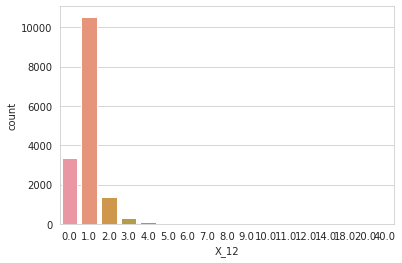

In [ ]:
#Visualization of X_12 Test Set
sns.set_style('whitegrid')
sns.countplot(x='X_12', data = test_data)

In [ ]:
#Checking the median value for 'X_12' (testing data)
test_data['X_12'].median()

1.0

In [ ]:
#Replacing the NaN or missing value into  median (testing data)
test_data['X_12'] = test_data['X_12'].replace(np.NaN, test_data['X_12'].median())

In [ ]:
test_data['X_12'].isnull().sum()

0

In [ ]:
train_data.columns

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE'],
      dtype='object')

In [ ]:
#droping unwanted columns
train_data.drop(['DATE'], axis=1, inplace=True)
test_data.drop(['DATE'], axis=1, inplace=True)

In [ ]:
train_data.head()

,INCIDENT_ID,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


Splitting the Training and Testing Dataset

In [ ]:
#train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(['MULTIPLE_OFFENSE', 'INCIDENT_ID'], axis=1), train_data['MULTIPLE_OFFENSE'], test_size = 0.25, random_state = 0)

In [ ]:
y_train

1854     1
20512    1
6020     1
12429    1
4701     1
        ..
13123    1
19648    1
9845     1
10799    1
2732     1
Name: MULTIPLE_OFFENSE, Length: 17892, dtype: int64

**Model Building Random Forest Classifier**

In [ ]:
#Model building Random Forest
from sklearn.ensemble import RandomForestClassifier
random_classifier = RandomForestClassifier(n_estimators=100, criterion= 'entropy', random_state = 0)
random_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#prediction
random_prediction = random_classifier.predict(X_test)

In [ ]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
random_cm = confusion_matrix(y_test, random_prediction)
random_cm

array([[ 219,   49],
       [   6, 5690]])

In [ ]:
#Classification report
from sklearn.metrics import classification_report
random_report = classification_report(y_test,random_prediction)
print(random_report)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       268
           1       0.99      1.00      1.00      5696

    accuracy                           0.99      5964
   macro avg       0.98      0.91      0.94      5964
weighted avg       0.99      0.99      0.99      5964



In [ ]:
from sklearn.metrics import accuracy_score
random_score = accuracy_score(y_test, random_prediction)
random_score

0.9907780013413816

**Model building Gradinet Boosting classifier**

In [ ]:
# Model building Gradient Boosting classifier
from  sklearn.ensemble import GradientBoostingClassifier
gbc_classifier = GradientBoostingClassifier()
gbc_classifier.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#prediction
gbc_prediction = gbc_classifier.predict(X_test)

In [ ]:
#confusion Matrix
gbc_cm = confusion_matrix(y_test, gbc_prediction)
gbc_cm

array([[ 265,    3],
       [   0, 5696]])

In [ ]:
#Classification Report
gbc_report = classification_report(y_test, gbc_prediction)
print(gbc_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       268
           1       1.00      1.00      1.00      5696

    accuracy                           1.00      5964
   macro avg       1.00      0.99      1.00      5964
weighted avg       1.00      1.00      1.00      5964



In [ ]:
gbc_score = accuracy_score(y_test, gbc_prediction)
gbc_score

0.9994969818913481

**K-Fold Cross Validation**

since the Gradient Boosting Classifier model got 99.94 accuracy we need to check whether the model overfitted or not.

K-fold cross validation prevents Overfitting

In [ ]:
#Applying K-fold cross validation to evaluate our model
from sklearn.model_selection import cross_val_score
final_accuracy = cross_val_score(estimator = gbc_classifier, X = X_train, y= y_train, cv=10)
final_accuracy.mean()

0.998938110301626